# Speed up lambda nesting

### Define machinery
Define some functions to benchmark alternatives.

In [1]:
import timeit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def benchmark(func, number=100, repeat=10):
    times = timeit.repeat(func, number=number, repeat=repeat)
    return np.mean(times), np.std(times)

# test
def f1(x): return x

benchmark(lambda: f1(1))

(1.8255499162478374e-05, 4.855875611440968e-06)

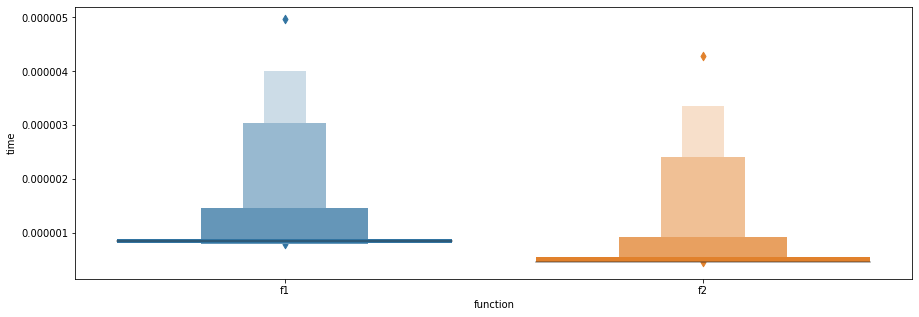

In [3]:
def compare(*func_list, number=100, repeat=10):
    try:
        iter(func_list[0])
        func_list = func_list[0]
    except:
        pass
    
    times = pd.DataFrame(columns=['function', 'time']) 
    for i, func in enumerate(func_list):
        ts = timeit.repeat(func, number=1, repeat=repeat)
        # replace i with https://www.google.com/search?client=firefox-b-e&q=function+name+python
        times = times.append([{'function': func.__name__,'time': t} for t in ts], ignore_index=True)
        
    plt.figure(figsize=[15,5])
    sns.boxenplot(x="function", y="time", data=times, k_depth="proportion", outlier_prop=0.15)
    return times

# test
def f1(): return 1
def f2(): return 2

number = 1000
repeat = 1000

x = compare([f1, f2], number, repeat)

## Profile nesting criticalities
Find out how much and exactly where nesting lambdas slow down the computation.

In [4]:
def test_factory(n):
    identity = lambda x: x
    res = identity
    for j in range(n):
        res = identity(res)
        
    return res

benchmark(lambda: test_factory(int(1e5)))

(0.580287327599217, 0.006227147203798476)

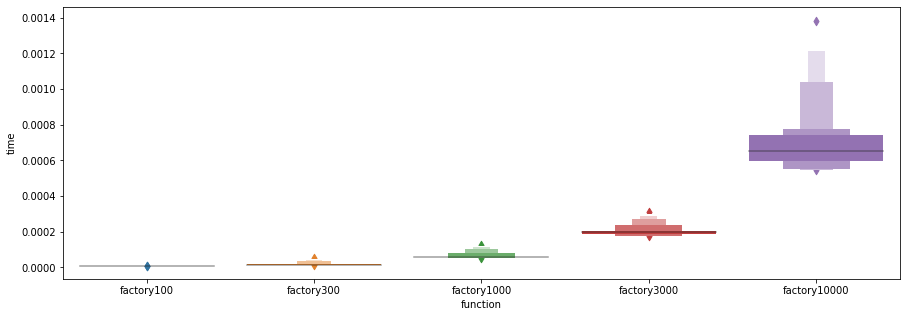

In [5]:
l = [100, 300, 1000, 3000, 10000]
for i in l:
    exec(f"def factory{i}(): return test_factory({i}); factory")
f_list = [eval(f"factory{i}") for i in l]

x = compare(f_list, 1000, 1000)

## Solutions with `numba`
Cook up solutions using `numba` library:
- inlining
- ...
- ...

### Inlining